# Clustering at the composition scale

In [1]:
#install.packages('rpostgis', 'rgdal', 'magrittr', 'dbscan', 'corrplot')
library('rpostgis')
library('rgdal')
library('magrittr')
library('tidyverse')
library('dbscan')
#library('corrplot')

Warning message:
"package 'rpostgis' was built under R version 3.4.4"Loading required package: RPostgreSQL
Loading required package: DBI
Loading required package: sp
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.0, released 2017/04/28
 Path to GDAL shared files: C:/R/libs/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/R/libs/rgdal/proj
 Linking to sp version: 1.2-5 
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract()   masks magrittr::extract()
x dplyr::filter()    masks stats::filter()
x dplyr::lag()       masks stat

In [2]:
conn <- dbConnect("PostgreSQL", dbname = 'base_data', host = 'localhost', user = 'postgres', password = 'asd')

In [3]:
ne_scale_query <- "SELECT a.geom, a.id, de_ar_100r, de_ar_300r, de_ar_500r, de_bd_100r, de_bd_300r, de_bd_500r, de_sq_100r, de_sq_300r, de_sq_500r,
net_de_100r, net_de_300r, net_de_500r, net_int_100r, net_int_300r, net_int_500r, net_lgt_100r, net_lgt_300r, net_lgt_500r,
de_ar_100w, de_ar_300w, de_ar_500w, de_bd_100w, de_bd_300w, de_bd_500w, de_sq_100w, de_sq_300w, de_sq_500w,
net_de_100w, net_de_300w, net_de_500w, net_int_100w, net_int_300w, net_int_500w, net_lgt_100w, net_lgt_300w, net_lgt_500w,
net_dd_bd, net_dd_sqm, net_dd_carea, net_dd_de, net_dd_int, net_dd_length
FROM public.bd a,
     public.AGGLO b
WHERE ST_Intersects(a.geom, b.geom)
ORDER BY a.id;"

In [4]:
sub_in_query <- function(gid, agglo, query) {
    q <- gsub('GID', gid, query) %>%
         gsub('AGGLO', agglo, .)
    return(q)
}

In [5]:
ne_stata <- pgGetGeom(conn, query = sub_in_query(0, "stata", ne_scale_query))
row.names(ne_stata@data) <- ne_stata@data$id
ne_stata@data$id <- NULL 
ne_stata@data <- data.frame(scale(ne_stata@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [22]:
ne_statb <- pgGetGeom(conn, query = sub_in_query(0, "statb", ne_scale_query))
row.names(ne_statb@data) <- ne_statb@data$id
ne_statb@data$id <- NULL 
ne_statb@data <- data.frame(scale(ne_statb@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [59]:
ne_morf <- pgGetGeom(conn, query = sub_in_query(0, "morfrac", ne_scale_query))
row.names(ne_morf@data) <- ne_morf@data$id
ne_morf@data$id <- NULL 
ne_morf@data <- data.frame(scale(ne_morf@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [80]:
ne_ccak <- pgGetGeom(conn, query = sub_in_query(0, "cca_king", ne_scale_query))
row.names(ne_ccak@data) <- ne_ccak@data$id
ne_ccak@data$id <- NULL 
ne_ccak@data <- data.frame(scale(ne_ccak@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [81]:
ne_ccal <- pgGetGeom(conn, query = sub_in_query(0, "cca_lenient", ne_scale_query))
row.names(ne_ccal@data) <- ne_ccal@data$id
ne_ccal@data$id <- NULL 
ne_ccal@data <- data.frame(scale(ne_ccal@data))

Returning MultiPolygon types in SpatialPolygons*-class.


## Clusterings

### StatA

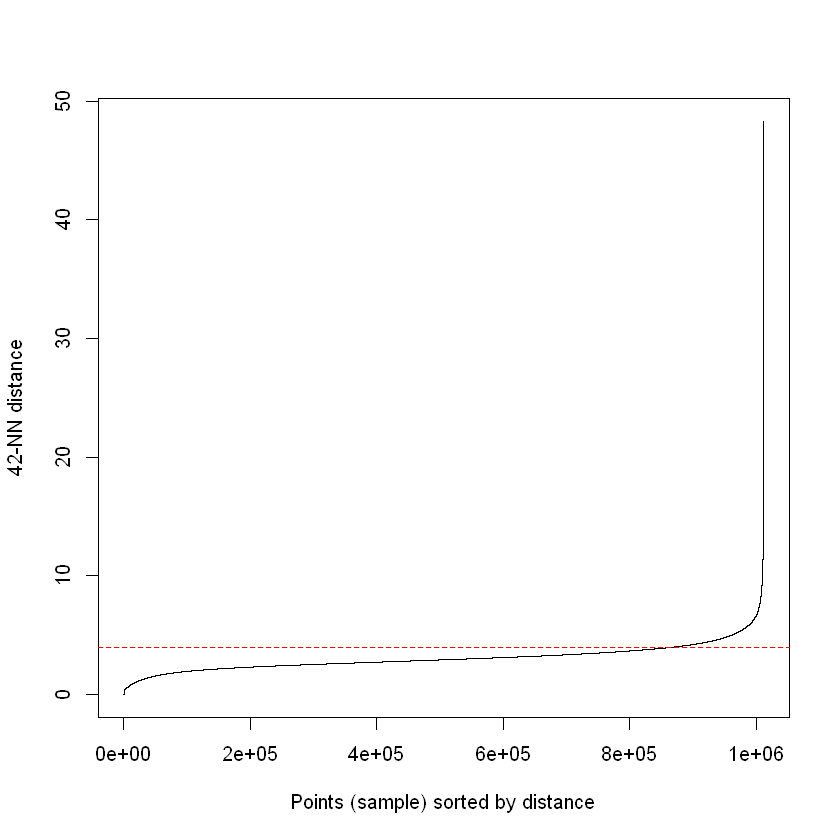

In [6]:
kNNdistplot(ne_stata@data, k = 42)
abline(h = 4, col = 'red', lty = 2)

In [6]:
res_stata <- dbscan(ne_stata@data, eps = 4, minPts = 43)
res_stata

DBSCAN clustering for 24094 objects.
Parameters: eps = 4, minPts = 43
The clustering contains 1 cluster(s) and 2214 noise points.

    0     1 
 2214 21880 

Available fields: cluster, eps, minPts

In [7]:
clusDBSCAN <- res_stata$cluster
ne_stata@data <- cbind(ne_stata@data, clusDBSCAN)
head(ne_stata@data)

,de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length,clusDBSCAN
788,-0.3500056,0.6019535,0.9144236,0.113024213,0.7075914,1.0532532,-0.2284096,0.8315891,1.175305,-0.1079346,...,1.5763999,1.2186746,0.6654491,1.04214841,2.280759,0.07655522,-0.003741389,1.0161327,0.7661948,1
789,0.5230985,0.7179034,1.1586378,-0.214848972,0.5431747,0.9345812,0.9067586,1.0122000,1.478725,0.6384995,...,0.3019748,1.3337525,0.6471598,1.11325710,2.450649,0.18890036,0.090601921,1.2763608,0.9606071,1
790,1.5614947,1.8104815,2.2822328,-0.761304280,-0.2423713,0.3253980,2.2905382,2.3878918,3.190331,-0.1079346,...,-1.0294259,0.8072717,1.6934402,1.68212661,3.924135,0.94097228,0.326460197,2.3854280,2.0247226,1
791,0.9921208,1.3542294,1.7033352,0.768770582,0.6710543,0.6814142,1.2480181,1.9062181,2.159465,-0.8543687,...,1.5301184,0.9061537,1.2026120,0.31525958,2.428417,-0.24806920,-0.404700458,0.8798228,0.4561526,1
792,0.1379156,1.2175291,1.5645244,0.003733151,0.6710543,0.8554665,0.2213797,1.6904380,1.939455,-0.8543687,...,0.9767868,1.0370188,1.0871404,0.08613159,2.226162,-0.47029818,-0.687730389,0.5948111,0.1871860,1
793,1.5277670,1.2328407,1.4711250,0.222315274,0.3056841,0.6181224,1.7229667,1.6182240,1.981583,-0.8543687,...,1.0436392,1.0511136,1.4776155,0.46801158,2.529416,-0.15612712,-0.310357148,1.1958140,0.6654436,1


In [8]:
sel <- ne_stata@data$clusDBSCAN == 1
ne_stata_to_class <- ne_stata[sel,]

In [27]:
head(ne_stata_to_class@data[, c(-43, -44)])

,de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_int_500w,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length
788,-0.3500056,0.6019535,0.9144236,0.113024213,0.7075914,1.0532532,-0.2284096,0.8315891,1.175305,-0.1079346,...,0.10281310,1.5763999,1.2186746,0.6654491,1.04214841,2.280759,0.07655522,-0.003741389,1.0161327,0.7661948
789,0.5230985,0.7179034,1.1586378,-0.214848972,0.5431747,0.9345812,0.9067586,1.0122000,1.478725,0.6384995,...,0.01665785,0.3019748,1.3337525,0.6471598,1.11325710,2.450649,0.18890036,0.090601921,1.2763608,0.9606071
790,1.5614947,1.8104815,2.2822328,-0.761304280,-0.2423713,0.3253980,2.2905382,2.3878918,3.190331,-0.1079346,...,1.00744323,-1.0294259,0.8072717,1.6934402,1.68212661,3.924135,0.94097228,0.326460197,2.3854280,2.0247226
791,0.9921208,1.3542294,1.7033352,0.768770582,0.6710543,0.6814142,1.2480181,1.9062181,2.159465,-0.8543687,...,0.74897748,1.5301184,0.9061537,1.2026120,0.31525958,2.428417,-0.24806920,-0.404700458,0.8798228,0.4561526
792,0.1379156,1.2175291,1.5645244,0.003733151,0.6710543,0.8554665,0.2213797,1.6904380,1.939455,-0.8543687,...,0.66282223,0.9767868,1.0370188,1.0871404,0.08613159,2.226162,-0.47029818,-0.687730389,0.5948111,0.1871860
793,1.5277670,1.2328407,1.4711250,0.222315274,0.3056841,0.6181224,1.7229667,1.6182240,1.981583,-0.8543687,...,1.56745236,1.0436392,1.0511136,1.4776155,0.46801158,2.529416,-0.15612712,-0.310357148,1.1958140,0.6654436


In [28]:
test_km <- kmeans(ne_stata_to_class@data[, c(-43, -44)], 15, nstart = 5, iter.max = 50)

In [29]:
round(test_km$betweenss / test_km$totss, 2)

[1] 0.57

In [9]:
stata_kmeans <- kmeans(ne_stata_to_class@data[, c(37:42)], 12, nstart = 5, iter.max = 50)

In [114]:
colnames(ne_stata_to_class@data[,c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36)])

[1] "de_ar_500r"   "de_bd_500r"   "de_sq_500r"   "net_de_500r"  "net_int_500r"
 [6] "net_lgt_500r" "de_ar_500w"   "de_bd_500w"   "de_sq_500w"   "net_de_500w" 
[11] "net_int_500w" "net_lgt_500w"

Testés : 
- que rayon c(1:18) 14 -> 0.66
- que marche c(19:36) 11 -> 0.65
- que drive c(37:42) 12 -> 0.85 !!!

- rayon et walking c(1:36) 15 -> 0.59 
- rayon et drive 14 -> 0.63
- walking et drive 14 -> 0.63

- 100m rayon et walk 14 -> 0.63
- 300m rw 15 -> 0.7
- 500 rw 13 c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) -> 0.76

- 100 et 300 rw 15 -> 0.57
- 300 et 500 rw 15 -> 0.7

In [109]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(ne_stata_to_class@data[, c(2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24, 26, 27, 29, 30, 32, 33, 35, 36)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

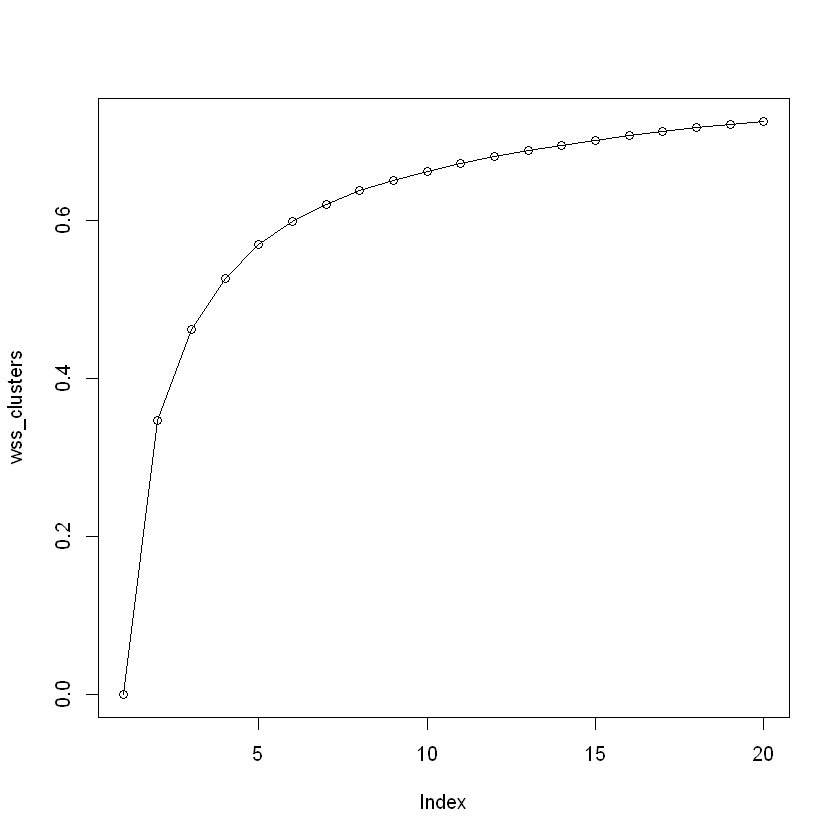

In [110]:
plot(wss_clusters, type="o")

In [10]:
stata_kmeans <- kmeans(ne_stata_to_class@data[, c(37:42)], 12, nstart = 5, iter.max = 50)

In [18]:
stata_kmeans <- kmeans(ne_stata_to_class@data[, c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) ], 13, nstart = 5, iter.max = 50)

In [25]:
round(stata_kmeans$betweenss / stata_kmeans$totss, 2)

[1] 0.85

In [10]:
clusKME13 <- stata_kmeans$cluster
ne_stata_to_class@data <- cbind(ne_stata_to_class@data, clusKME13)

In [13]:
writeOGR(ne_stata, dsn = "ne_stata.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(ne_stata_to_class, dsn = "ne_stata_kmeans_drive.gpkg", layer = 'km12d', driver = "GPKG")

Layer for the 500 rw

In [50]:
writeOGR(ne_stata_to_class, dsn = "ne_stata_kmeans_walk.gpkg", layer = 'km13w', driver = "GPKG")

### Stat B

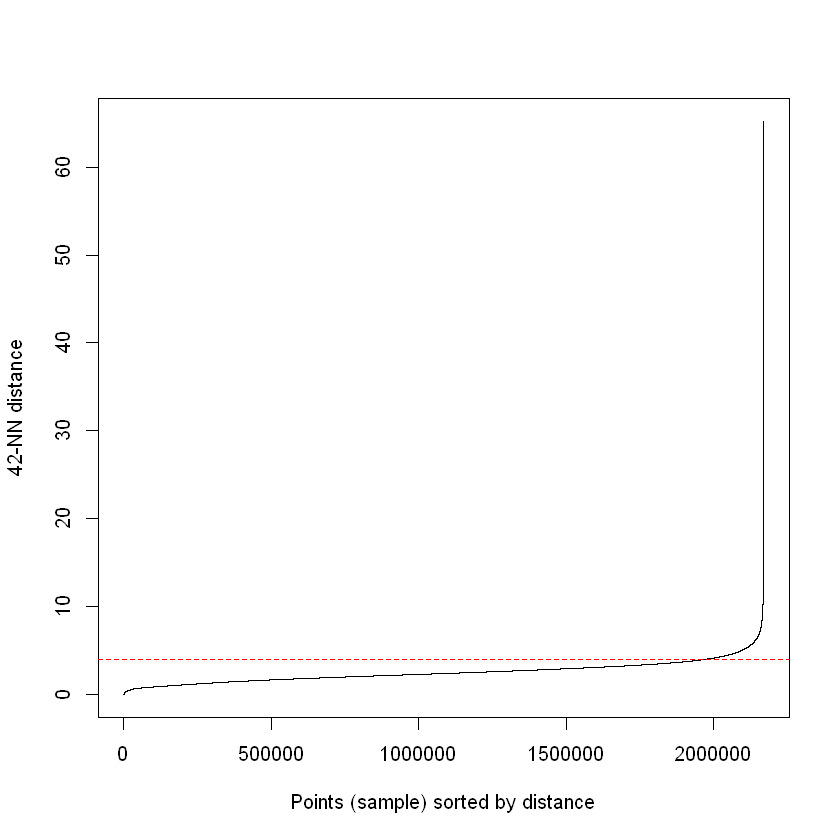

In [117]:
kNNdistplot(ne_statb@data, k = 42)
abline(h = 4, col = 'red', lty = 2)

In [23]:
res_statb <- dbscan(ne_statb@data, eps = 4, minPts = 43)
res_statb

DBSCAN clustering for 51704 objects.
Parameters: eps = 4, minPts = 43
The clustering contains 1 cluster(s) and 3302 noise points.

    0     1 
 3302 48402 

Available fields: cluster, eps, minPts

In [24]:
clusDBSCAN <- res_statb$cluster
ne_statb@data <- cbind(ne_statb@data, clusDBSCAN)
head(ne_statb@data)

de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length,clusDBSCAN
-0.9424469,-1.1050981,-1.0502607,-1.3575813,-1.224437,-1.2001475,-0.6138302,-0.7485340,-0.7395518,0.03720405,...,-0.9038403,-1.4873935,-1.321480,-0.9322437,-0.6685701,-0.919928542,-0.7687093,-1.1462564,-1.2759523,1
-0.7956092,-0.9843688,-0.9843264,-1.1393665,-1.117343,-1.1478125,-0.5513697,-0.6919050,-0.7056554,-0.78484645,...,-0.9038403,-0.4698293,-1.161336,-0.7465080,-0.6357848,-0.008308342,-0.6003279,-0.9140474,-0.8017325,1
-0.7653616,-0.9888312,-0.9566137,-0.9211518,-1.117343,-1.0954775,-0.5544561,-0.6930536,-0.6925363,-0.78484645,...,-0.9038403,-0.4698293,-1.161336,-0.7465080,-0.6357848,-0.008308342,-0.6003279,-0.9140474,-0.8017325,1
-0.8438284,-0.9976806,-0.9364637,-1.0302592,-1.117343,-1.0356661,-0.5929692,-0.6987428,-0.6863916,-0.78484645,...,-0.9038403,-0.3922385,-1.007652,-0.8051614,-0.6305448,0.020568143,-0.7206003,-0.9256579,-0.8502523,1
-0.8955776,-1.0827200,-0.8473320,-1.4666887,-1.295834,-0.9085668,-0.5790268,-0.7346945,-0.6484371,0.03720405,...,-0.9038403,-1.5283399,-1.376498,-0.9786776,-0.6764737,-1.139236529,-1.0573631,-1.2101139,-1.3017842,1
-0.8848986,-1.0708895,-0.8067562,-1.4666887,-1.277985,-0.8113732,-0.5798495,-0.7302081,-0.6318328,0.03720405,...,-0.9038403,-1.5283399,-1.376498,-0.9786776,-0.6764737,-1.139236529,-1.0573631,-1.2101139,-1.3017842,1


In [25]:
sel <- ne_statb@data$clusDBSCAN == 1
ne_statb_to_class <- ne_statb[sel,]

In [26]:
head(ne_statb_to_class@data[, -43])

de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_int_500w,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length
-0.9424469,-1.1050981,-1.0502607,-1.3575813,-1.224437,-1.2001475,-0.6138302,-0.7485340,-0.7395518,0.03720405,...,-1.291204,-0.9038403,-1.4873935,-1.321480,-0.9322437,-0.6685701,-0.919928542,-0.7687093,-1.1462564,-1.2759523
-0.7956092,-0.9843688,-0.9843264,-1.1393665,-1.117343,-1.1478125,-0.5513697,-0.6919050,-0.7056554,-0.78484645,...,-1.248025,-0.9038403,-0.4698293,-1.161336,-0.7465080,-0.6357848,-0.008308342,-0.6003279,-0.9140474,-0.8017325
-0.7653616,-0.9888312,-0.9566137,-0.9211518,-1.117343,-1.0954775,-0.5544561,-0.6930536,-0.6925363,-0.78484645,...,-1.248025,-0.9038403,-0.4698293,-1.161336,-0.7465080,-0.6357848,-0.008308342,-0.6003279,-0.9140474,-0.8017325
-0.8438284,-0.9976806,-0.9364637,-1.0302592,-1.117343,-1.0356661,-0.5929692,-0.6987428,-0.6863916,-0.78484645,...,-1.075311,-0.9038403,-0.3922385,-1.007652,-0.8051614,-0.6305448,0.020568143,-0.7206003,-0.9256579,-0.8502523
-0.8955776,-1.0827200,-0.8473320,-1.4666887,-1.295834,-0.9085668,-0.5790268,-0.7346945,-0.6484371,0.03720405,...,-1.334383,-0.9038403,-1.5283399,-1.376498,-0.9786776,-0.6764737,-1.139236529,-1.0573631,-1.2101139,-1.3017842
-0.8848986,-1.0708895,-0.8067562,-1.4666887,-1.277985,-0.8113732,-0.5798495,-0.7302081,-0.6318328,0.03720405,...,-1.334383,-0.9038403,-1.5283399,-1.376498,-0.9786776,-0.6764737,-1.139236529,-1.0573631,-1.2101139,-1.3017842


Testés : 
- que rayon c(1:18) 14 -> 0.66
- que marche c(19:36) 11 -> 0.65
- que drive c(37:42) 13 -> 0.88 !!!

- rayon et walking c(1:36) 15 -> 0.59 
- rayon et drive 14 -> 0.63
- walking et drive 14 -> 0.63

- 100m rayon et walk 14 -> 0.63
- 300m rw 15 -> 0.7
- 500 rw 13 c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) -> 0.82

- 100 et 300 rw 15 -> 0.57
- 300 et 500 rw 15 -> 0.7

In [33]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(ne_statb_to_class@data[, c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"

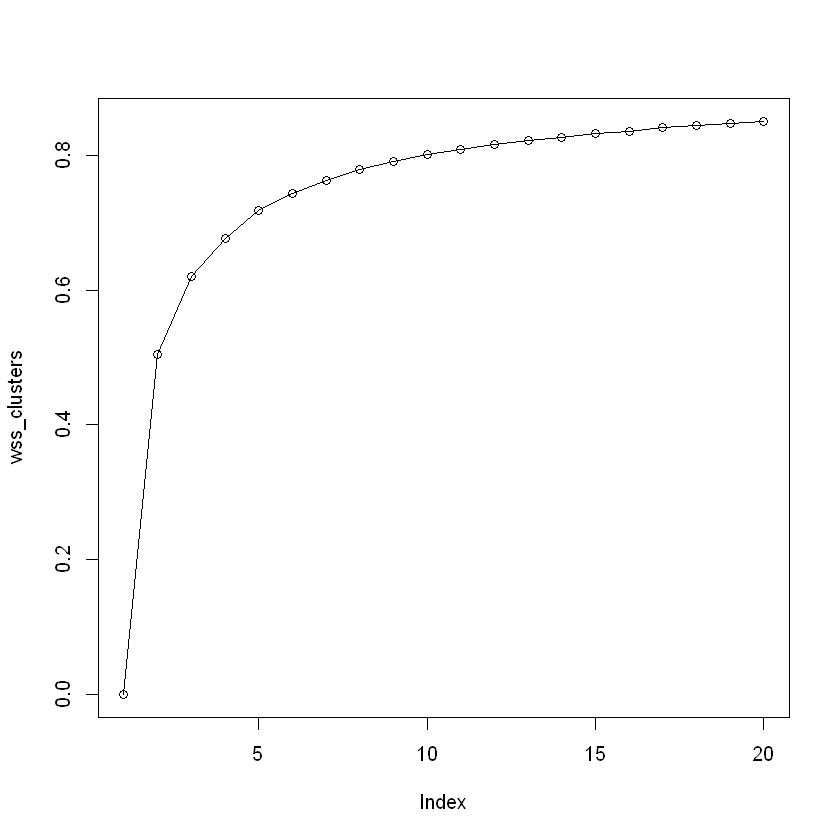

In [34]:
plot(wss_clusters, type="o")

In [29]:
statb_kmeans <- kmeans(ne_statb_to_class@data[, c(37:42)], 13, nstart = 5, iter.max = 50)

In [35]:
statb_kmeans <- kmeans(ne_statb_to_class@data[, c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) ], 13, nstart = 5, iter.max = 50)

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2420100)"

In [36]:
round(statb_kmeans$betweenss / statb_kmeans$totss, 2)

[1] 0.82

In [37]:
clusKME13 <- statb_kmeans$cluster
ne_statb_to_class@data <- cbind(ne_statb_to_class@data, clusKME13)

In [32]:
writeOGR(ne_statb, dsn = "ne_statb.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(ne_statb_to_class, dsn = "ne_statb_kmeans_drive.gpkg", layer = 'km13d', driver = "GPKG")

Layer for the 500 rw

In [51]:
writeOGR(ne_statb_to_class[, -44], dsn = "ne_statb_kmeans_walk.gpkg", layer = 'km13w', driver = "GPKG")

### Fractal

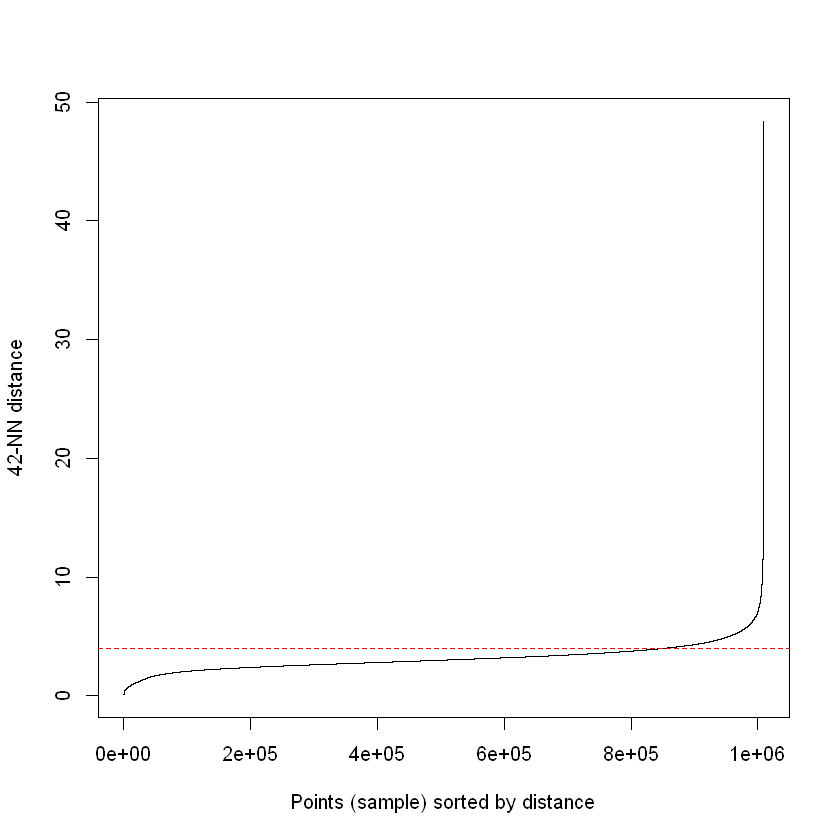

In [60]:
kNNdistplot(ne_morf@data, k = 42)
abline(h = 4, col = 'red', lty = 2)

In [61]:
res_morf <- dbscan(ne_morf@data, eps = 4, minPts = 43)
res_morf

DBSCAN clustering for 24037 objects.
Parameters: eps = 4, minPts = 43
The clustering contains 1 cluster(s) and 2403 noise points.

    0     1 
 2403 21634 

Available fields: cluster, eps, minPts

In [62]:
clusDBSCAN <- res_morf$cluster
ne_morf@data <- cbind(ne_morf@data, clusDBSCAN)
head(ne_morf@data)

,de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length,clusDBSCAN
788,-0.3611452,0.5970866,0.9162597,0.06971974,0.6950789,1.0692591,-0.232942,0.8270909,1.173743,-0.1123754,...,1.5634415,1.1990060,0.6392873,1.04897843,2.281749,0.09933664,-0.00203771,1.0249565,0.7649096,1
789,0.5252631,0.7152515,1.1653903,-0.27189609,0.5196382,0.9418066,0.905206,1.0088283,1.479263,0.6321583,...,0.2868738,1.3154685,0.6204981,1.12297220,2.451903,0.21322266,0.09274786,1.2894133,0.9624794,1
790,1.5794821,1.8287001,2.3116050,-0.84125579,-0.3185787,0.2875502,2.292618,2.3931000,3.202713,-0.1123754,...,-1.0467653,0.7826532,1.6953733,1.71492234,3.927684,0.97560970,0.32971179,2.4165030,2.0438775,1
791,1.0014322,1.3637326,1.7210533,0.75295139,0.6560921,0.6699078,1.247361,1.9084222,2.164713,-0.8569092,...,1.5170821,0.8827250,1.1911308,0.29259769,2.429637,-0.22974021,-0.40487639,0.8864315,0.4498319,1
792,0.1342108,1.2244210,1.5794480,-0.04415220,0.6560921,0.8568382,0.218028,1.6912963,1.943181,-0.8569092,...,0.9628203,1.0151646,1.0725034,0.05417333,2.227067,-0.45501720,-0.68923311,0.5967883,0.1764969,1
793,1.5452404,1.2400252,1.4841684,0.18359168,0.2662238,0.6019331,1.723557,1.6186320,1.985600,-0.8569092,...,1.0297851,1.0294289,1.4736501,0.45154727,2.530793,-0.13653709,-0.31009082,1.2075576,0.6625220,1


In [63]:
sel <- ne_morf@data$clusDBSCAN == 1
ne_morf_to_class <- ne_morf[sel,]

In [64]:
head(ne_morf_to_class@data[, -43])

,de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_int_500w,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length
788,-0.3611452,0.5970866,0.9162597,0.06971974,0.6950789,1.0692591,-0.232942,0.8270909,1.173743,-0.1123754,...,0.06890795,1.5634415,1.1990060,0.6392873,1.04897843,2.281749,0.09933664,-0.00203771,1.0249565,0.7649096
789,0.5252631,0.7152515,1.1653903,-0.27189609,0.5196382,0.9418066,0.905206,1.0088283,1.479263,0.6321583,...,-0.01943492,0.2868738,1.3154685,0.6204981,1.12297220,2.451903,0.21322266,0.09274786,1.2894133,0.9624794
790,1.5794821,1.8287001,2.3116050,-0.84125579,-0.3185787,0.2875502,2.292618,2.3931000,3.202713,-0.1123754,...,0.99650804,-1.0467653,0.7826532,1.6953733,1.71492234,3.927684,0.97560970,0.32971179,2.4165030,2.0438775
791,1.0014322,1.3637326,1.7210533,0.75295139,0.6560921,0.6699078,1.247361,1.9084222,2.164713,-0.8569092,...,0.73147945,1.5170821,0.8827250,1.1911308,0.29259769,2.429637,-0.22974021,-0.40487639,0.8864315,0.4498319
792,0.1342108,1.2244210,1.5794480,-0.04415220,0.6560921,0.8568382,0.218028,1.6912963,1.943181,-0.8569092,...,0.64313658,0.9628203,1.0151646,1.0725034,0.05417333,2.227067,-0.45501720,-0.68923311,0.5967883,0.1764969
793,1.5452404,1.2400252,1.4841684,0.18359168,0.2662238,0.6019331,1.723557,1.6186320,1.985600,-0.8569092,...,1.57073667,1.0297851,1.0294289,1.4736501,0.45154727,2.530793,-0.13653709,-0.31009082,1.2075576,0.6625220


In [114]:
colnames(ne_morf_to_class@data[,c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36)])

[1] "de_ar_500r"   "de_bd_500r"   "de_sq_500r"   "net_de_500r"  "net_int_500r"
 [6] "net_lgt_500r" "de_ar_500w"   "de_bd_500w"   "de_sq_500w"   "net_de_500w" 
[11] "net_int_500w" "net_lgt_500w"

Testés : 
- que rayon c(1:18) 14 -> 0.66
- que marche c(19:36) 11 -> 0.65
- que drive c(37:42) 12 -> 0.85 !!!

- rayon et walking c(1:36) 15 -> 0.59 
- rayon et drive 14 -> 0.63
- walking et drive 14 -> 0.63

- 100m rayon et walk 14 -> 0.63
- 300m rw 15 -> 0.7
- 500 rw 13 c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) -> 0.73

- 100 et 300 rw 15 -> 0.57
- 300 et 500 rw 15 -> 0.7

In [72]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(ne_morf_to_class@data[, c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1081700)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1081700)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1081700)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1081700)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1081700)"

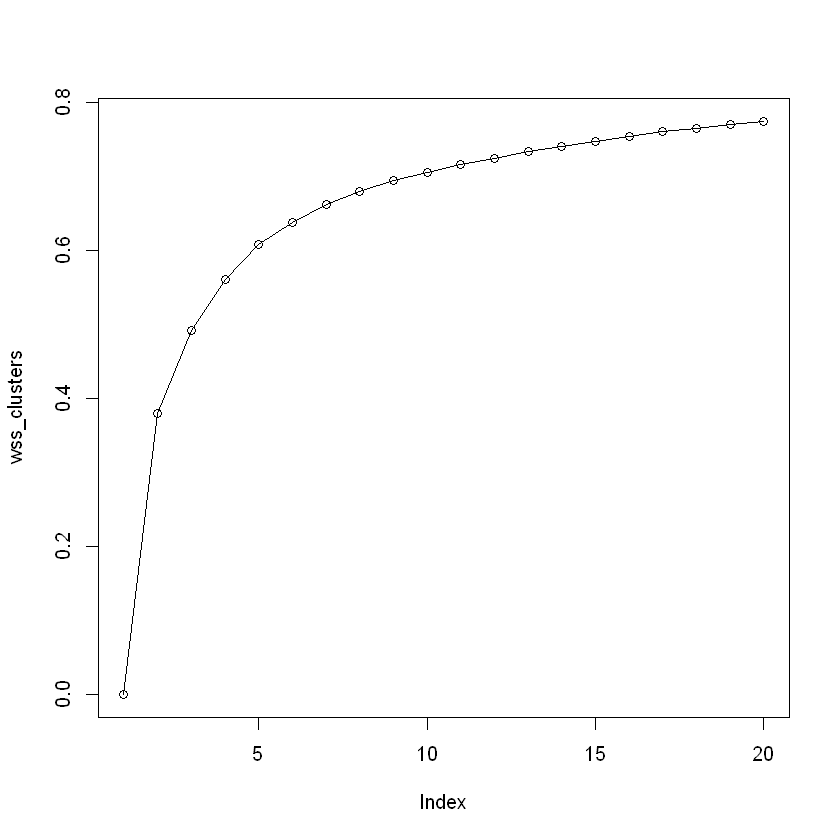

In [73]:
plot(wss_clusters, type="o")

In [67]:
morf_kmeans <- kmeans(ne_morf_to_class@data[, c(37:42)], 12, nstart = 5, iter.max = 50)

In [74]:
morf_kmeans <- kmeans(ne_morf_to_class@data[, c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) ], 13, nstart = 5, iter.max = 50)

In [75]:
round(morf_kmeans$betweenss / morf_kmeans$totss, 2)

[1] 0.73

In [77]:
clusKME13 <- morf_kmeans$cluster
ne_morf_to_class@data <- cbind(ne_morf_to_class@data, clusKME13)

In [71]:
writeOGR(ne_morf, dsn = "ne_morf.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(ne_morf_to_class, dsn = "ne_morf_kmeans_drive.gpkg", layer = 'km12d', driver = "GPKG")

Layer for the 500 rw

In [123]:
writeOGR(ne_morf_to_class[, -44], dsn = "ne_morf_kmeans_walk.gpkg", layer = 'km13w', driver = "GPKG")

### CCA King

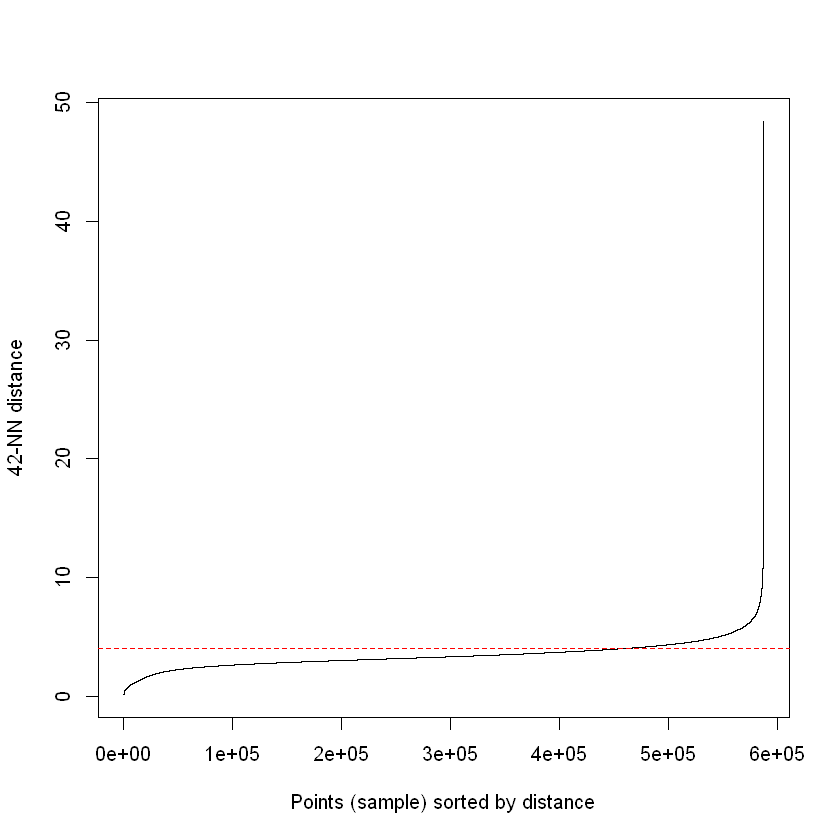

In [82]:
kNNdistplot(ne_ccak@data, k = 42)
abline(h = 4, col = 'red', lty = 2)

In [83]:
res_ccak <- dbscan(ne_ccak@data, eps = 4, minPts = 43)
res_ccak

DBSCAN clustering for 13990 objects.
Parameters: eps = 4, minPts = 43
The clustering contains 1 cluster(s) and 1879 noise points.

    0     1 
 1879 12111 

Available fields: cluster, eps, minPts

In [84]:
clusDBSCAN <- res_ccak$cluster
ne_ccak@data <- cbind(ne_ccak@data, clusDBSCAN)
head(ne_ccak@data)

,de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length,clusDBSCAN
788,-0.59259952,0.2288516,0.4976855,-0.19644116,0.39049469,0.7238499,-0.427082497,0.4341080,0.7163480,-0.07672848,...,1.4948942,1.0278426,0.4206073,0.71354979,1.718659,0.14778872,-0.05839536,0.8274382,0.63808642,1
789,0.33540306,0.3440245,0.7437076,-0.56144183,0.19557786,0.5846525,0.667102200,0.5954101,0.9902455,0.68891444,...,0.2416362,1.1430946,0.4013566,0.78631305,1.869069,0.26129624,0.03481336,1.0887214,0.82718485,1
790,1.43909079,1.4292805,1.8756206,-1.16977630,-0.73569146,-0.1298944,2.000922539,1.8240290,2.5353134,-0.07672848,...,-1.0676510,0.6158171,1.5026327,1.36841913,3.173605,1.02114956,0.26783516,2.2022855,1.86221484,1
791,0.83391621,0.9760860,1.2924374,0.53356020,0.34717984,0.2876979,0.996041030,1.3938503,1.6047500,-0.84237139,...,1.4493813,0.7148487,0.9860051,-0.03025243,1.849386,-0.18019447,-0.45453243,0.6905755,0.33651858,1
792,-0.07399917,0.8403018,1.1525990,-0.31810805,0.34717984,0.4918542,0.006467832,1.2011388,1.4061469,-0.84237139,...,0.9052402,0.8459119,0.8644640,-0.26471183,1.670322,-0.40472277,-0.73415859,0.4044082,0.07490365,1
793,1.40324237,0.8555108,1.0585082,-0.07477426,-0.08596868,0.2134593,1.453842308,1.1366451,1.4441754,-0.84237139,...,0.9709822,0.8600280,1.2754636,0.12605383,1.938805,-0.08730111,-0.36132371,1.0078480,0.54008905,1


In [85]:
sel <- ne_ccak@data$clusDBSCAN == 1
ne_ccak_to_class <- ne_ccak[sel,]

In [ ]:
head(ne_ccak_to_class@data[, -43])

In [100]:
colnames(ne_ccak_to_class@data[,c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37)])

[1] "de_ar_100r"   "de_bd_100r"   "de_sq_100r"   "net_de_100r"  "net_int_100r"
 [6] "net_lgt_100r" "de_ar_100w"   "de_bd_100w"   "de_sq_100w"   "net_de_100w" 
[11] "net_int_100w" "net_lgt_100w" "net_dd_bd"

Testés: 
- que rayon c(1:18) 14 -> 0.66
- que marche c(19:36) 11 -> 0.65
- que drive c(37:42) 12 -> 0.87 !!!

- rayon et walking c(1:36) 15 -> 0.59 
- rayon et drive 14 -> 0.63
- walking et drive 14 -> 0.63

- 100m rayon et walk 14 -> 0.63
- 300m rw 15 -> 0.7
- 500 rw 14 c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) -> 0.71

- 100 et 300 rw 15 -> 0.57
- 300 et 500 rw 15 -> 0.7

In [103]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(ne_ccak_to_class@data[,  c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) ], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

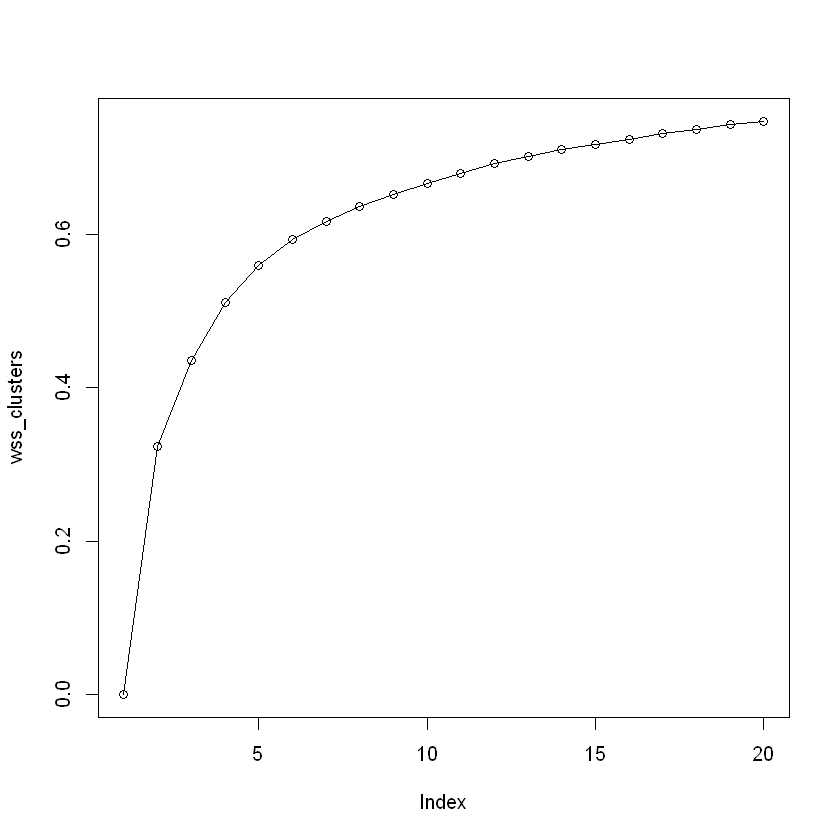

In [104]:
plot(wss_clusters, type="o")

In [88]:
ccak_kmeans <- kmeans(ne_ccak_to_class@data[, c(37:42)], 12, nstart = 5, iter.max = 50)

In [105]:
ccak_kmeans <- kmeans(ne_ccak_to_class@data[, c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) ], 14, nstart = 5, iter.max = 50)

In [106]:
round(ccak_kmeans$betweenss / ccak_kmeans$totss, 2)

[1] 0.71

In [107]:
clusKME14 <- ccak_kmeans$cluster
ne_ccak_to_class@data <- cbind(ne_ccak_to_class@data, clusKME14)

In [91]:
writeOGR(ne_ccak, dsn = "ne_ccak.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(ne_ccak_to_class, dsn = "ne_ccak_kmeans_drive.gpkg", layer = 'km12d', driver = "GPKG")

Layer for the 500 rw

In [122]:
writeOGR(ne_ccak_to_class[, -44], dsn = "ne_ccak_kmeans_walk.gpkg", layer = 'km14w', driver = "GPKG")

### CCA Lenient

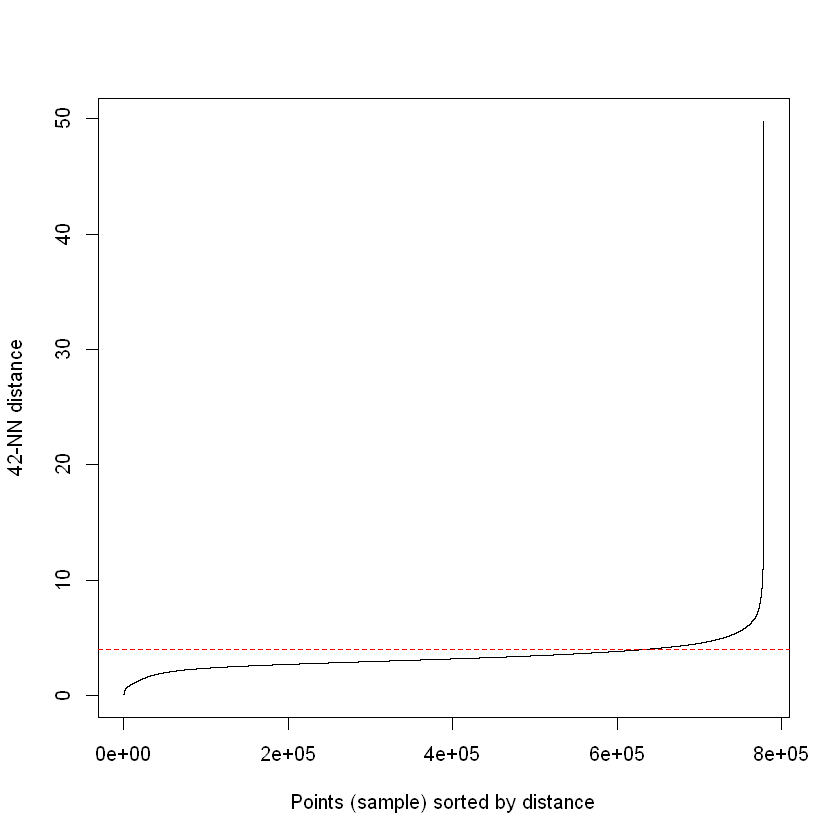

In [109]:
kNNdistplot(ne_ccal@data, k = 42)
abline(h = 4, col = 'red', lty = 2)

In [118]:
res_ccal <- dbscan(ne_ccal@data, eps = 4, minPts = 43)
res_ccal

DBSCAN clustering for 18538 objects.
Parameters: eps = 4, minPts = 43
The clustering contains 1 cluster(s) and 2236 noise points.

    0     1 
 2236 16302 

Available fields: cluster, eps, minPts

In [119]:
clusDBSCAN <- res_ccal$cluster
ne_ccal@data <- cbind(ne_ccal@data, clusDBSCAN)
head(ne_ccal@data)

,de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length,clusDBSCAN
788,-0.52408949,0.4032518,0.7065708,-0.14595665,0.50226532,0.89036685,-0.3397219,0.6349808,0.9521575,-0.1389494,...,1.4741189,1.0618082,0.4812733,0.8839699,2.017694,0.07171638,-0.089699718,0.8894028,0.66279645,1
789,0.44288968,0.5222520,0.9573342,-0.50119660,0.31772191,0.75704893,0.8218300,0.8080774,1.2433572,0.5959561,...,0.2227538,1.1768558,0.4624355,0.9590183,2.179834,0.18623660,0.005896785,1.1574124,0.85850795,1
790,1.59293286,1.6435715,2.1110607,-1.09326318,-0.56398553,0.07268361,2.2377715,2.1265333,2.8860275,-0.1389494,...,-1.0845560,0.6505132,1.5400884,1.5594059,3.586116,0.95286916,0.244888042,2.2996435,1.92973459,1
791,0.96234063,1.1753172,1.5166388,0.56452326,0.46125568,0.47263737,1.1710210,1.6648997,1.8966802,-0.8738549,...,1.4286748,0.7493693,1.0345429,0.1168080,2.158617,-0.25919300,-0.495984854,0.7490169,0.35068230,1
792,0.01629234,1.0350208,1.3741054,-0.26436996,0.46125568,0.66817032,0.1205214,1.4580971,1.6855312,-0.8738549,...,0.8853555,0.8802001,0.9156089,-0.1250148,1.965587,-0.48572450,-0.782774363,0.4554826,0.07991828,1
793,1.55557879,1.0507353,1.2782014,-0.02754333,0.05115919,0.40153448,1.6570084,1.3888877,1.7259620,-0.8738549,...,0.9509982,0.8942911,1.3177923,0.2780232,2.255009,-0.16547087,-0.400388352,1.0744570,0.56137195,1


In [120]:
sel <- ne_ccal@data$clusDBSCAN == 1
ne_ccal_to_class <- ne_ccal[sel,]

In [121]:
head(ne_ccal_to_class@data)

,de_ar_100r,de_ar_300r,de_ar_500r,de_bd_100r,de_bd_300r,de_bd_500r,de_sq_100r,de_sq_300r,de_sq_500r,net_de_100r,...,net_lgt_100w,net_lgt_300w,net_lgt_500w,net_dd_bd,net_dd_sqm,net_dd_carea,net_dd_de,net_dd_int,net_dd_length,clusDBSCAN
788,-0.52408949,0.4032518,0.7065708,-0.14595665,0.50226532,0.89036685,-0.3397219,0.6349808,0.9521575,-0.1389494,...,1.4741189,1.0618082,0.4812733,0.8839699,2.017694,0.07171638,-0.089699718,0.8894028,0.66279645,1
789,0.44288968,0.5222520,0.9573342,-0.50119660,0.31772191,0.75704893,0.8218300,0.8080774,1.2433572,0.5959561,...,0.2227538,1.1768558,0.4624355,0.9590183,2.179834,0.18623660,0.005896785,1.1574124,0.85850795,1
790,1.59293286,1.6435715,2.1110607,-1.09326318,-0.56398553,0.07268361,2.2377715,2.1265333,2.8860275,-0.1389494,...,-1.0845560,0.6505132,1.5400884,1.5594059,3.586116,0.95286916,0.244888042,2.2996435,1.92973459,1
791,0.96234063,1.1753172,1.5166388,0.56452326,0.46125568,0.47263737,1.1710210,1.6648997,1.8966802,-0.8738549,...,1.4286748,0.7493693,1.0345429,0.1168080,2.158617,-0.25919300,-0.495984854,0.7490169,0.35068230,1
792,0.01629234,1.0350208,1.3741054,-0.26436996,0.46125568,0.66817032,0.1205214,1.4580971,1.6855312,-0.8738549,...,0.8853555,0.8802001,0.9156089,-0.1250148,1.965587,-0.48572450,-0.782774363,0.4554826,0.07991828,1
793,1.55557879,1.0507353,1.2782014,-0.02754333,0.05115919,0.40153448,1.6570084,1.3888877,1.7259620,-0.8738549,...,0.9509982,0.8942911,1.3177923,0.2780232,2.255009,-0.16547087,-0.400388352,1.0744570,0.56137195,1


In [100]:
colnames(ne_ccak_to_class@data[,c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37)])

[1] "de_ar_100r"   "de_bd_100r"   "de_sq_100r"   "net_de_100r"  "net_int_100r"
 [6] "net_lgt_100r" "de_ar_100w"   "de_bd_100w"   "de_sq_100w"   "net_de_100w" 
[11] "net_int_100w" "net_lgt_100w" "net_dd_bd"

Testés : 
- que rayon c(1:18) 14 -> 0.66
- que marche c(19:36) 11 -> 0.65
- que drive c(37:42) 12 -> 0.85 !!!

- rayon et walking c(1:36) 15 -> 0.59 
- rayon et drive 14 -> 0.63
- walking et drive 14 -> 0.63

- 100m rayon et walk 14 -> 0.63
- 300m rw 15 -> 0.7
- 500 rw 14 c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) -> 0.72

- 100 et 300 rw 15 -> 0.57
- 300 et 500 rw 15 -> 0.7

In [130]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(ne_ccal_to_class@data[,  c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) ], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 815100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 815100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 815100)"

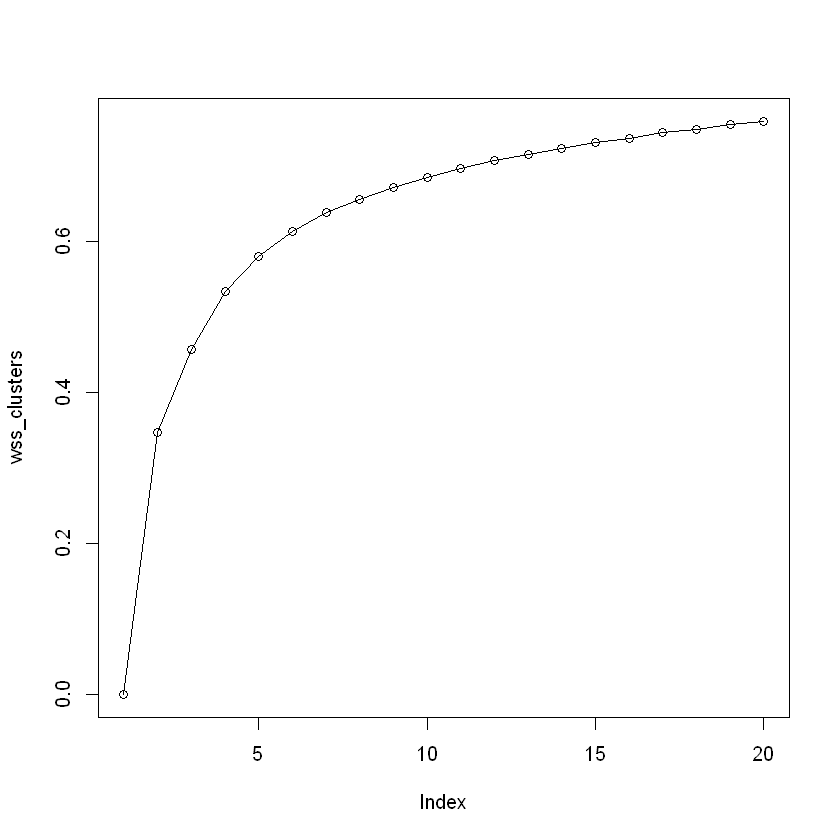

In [131]:
plot(wss_clusters, type="o")

In [126]:
ccal_kmeans <- kmeans(ne_ccal_to_class@data[, c(37:42)], 12, nstart = 5, iter.max = 50)

In [132]:
ccal_kmeans <- kmeans(ne_ccal_to_class@data[, c(3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36) ], 14, nstart = 5, iter.max = 50)

In [133]:
round(ccal_kmeans$betweenss / ccal_kmeans$totss, 2)

[1] 0.72

In [134]:
clusKME14 <- ccal_kmeans$cluster
ne_ccal_to_class@data <- cbind(ne_ccal_to_class@data, clusKME14)

In [129]:
writeOGR(ne_ccal, dsn = "ne_ccal.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(ne_ccal_to_class, dsn = "ne_ccal_kmeans_drive.gpkg", layer = 'km12d', driver = "GPKG")

Layer for the 500 rw

In [135]:
writeOGR(ne_ccal_to_class[, -44], dsn = "ne_ccal_kmeans_walk.gpkg", layer = 'km14w', driver = "GPKG")